Video FPS: 30.0
Total frames: 5594
Duration: 186.47 seconds (3.11 minutes)


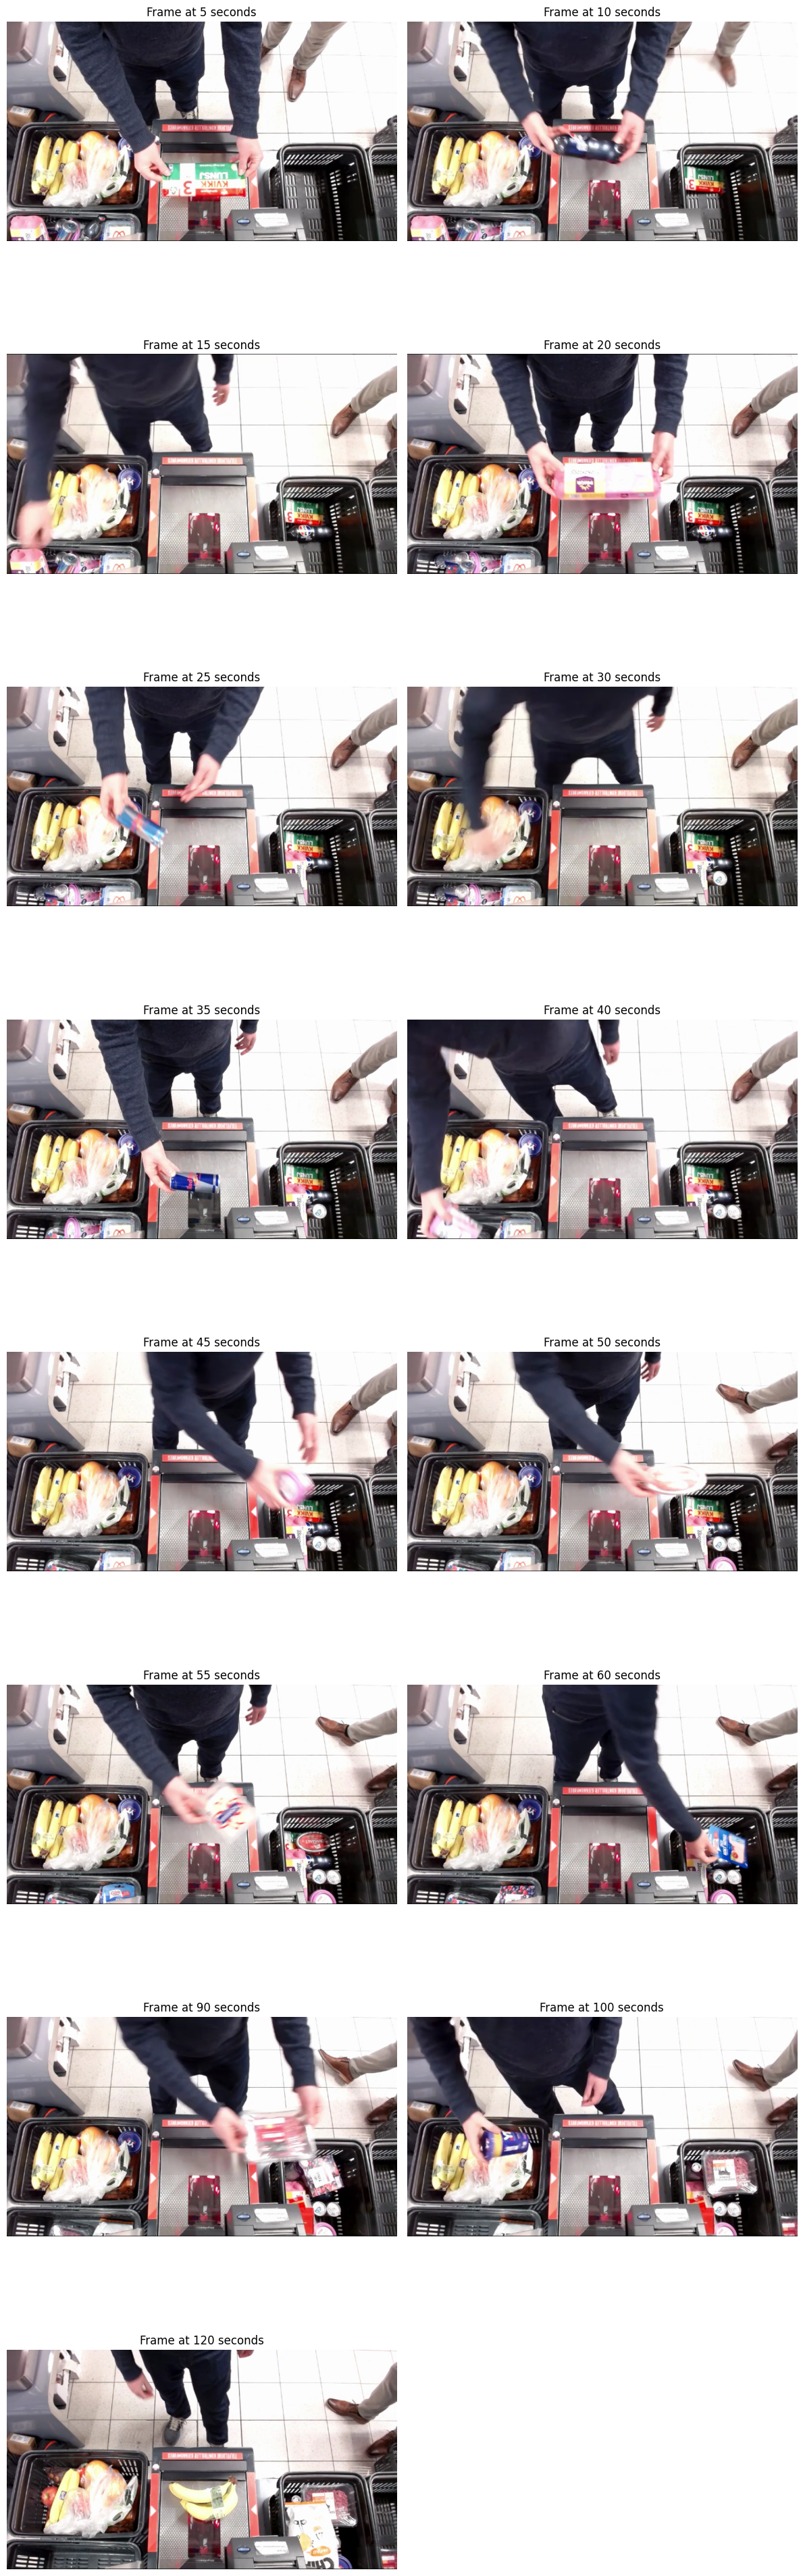

In [3]:
import cv2

try:
    video_path = 'videos/Nesten alle varer sakte tempo 480P.mp4'
    cap = cv2.VideoCapture(video_path)
    import matplotlib.pyplot as plt
    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    
    print(f"Video FPS: {fps}")
    print(f"Total frames: {frame_count}")
    print(f"Duration: {duration:.2f} seconds ({duration/60:.2f} minutes)")
    
    sample_frames = []
    sample_times = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 90, 100, 120]
    
    for time_sec in sample_times:
        frame_pos = int(time_sec * fps)
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_pos)
        ret, frame = cap.read()
        
        if ret:
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            sample_frames.append((time_sec, frame_rgb))
    
    cap.release()
    
    num_frames = len(sample_frames)
    num_cols = 2
    num_rows = (num_frames + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
    axes = axes.flatten()
    
    for i, (time_sec, frame) in enumerate(sample_frames):
        ax = axes[i]
        ax.imshow(frame)
        ax.set_title(f"Frame at {time_sec} seconds")
        ax.axis('off')
    
    for i in range(num_frames, len(axes)):
        fig.delaxes(axes[i])
    
    plt.tight_layout()
    plt.show()

except ImportError:
    print("OpenCV (cv2) not installed. Install it with 'pip install opencv-python' to extract video frames.")
except Exception as e:
    print(f"Error processing video: {e}")